In [168]:
import pandas as pd

In [169]:
RS1 = pd.read_csv('/users/ritwikchakradhar/Downloads/SvR1.csv')

In [170]:
RS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   1591 non-null   int64
 1   rpm     1591 non-null   int64
dtypes: int64(2)
memory usage: 25.0 KB


In [171]:
RS1.describe()

,speed,rpm
count,1591.000000,1591.000000
mean,40.372093,1036.294155
std,17.376477,296.676492
min,0.000000,509.000000
25%,32.500000,602.000000
50%,46.000000,1116.000000
75%,53.000000,1255.000000
max,70.000000,1846.000000


In [172]:
RS1.corr()

,speed,rpm
speed,1.000000,0.098285
rpm,0.098285,1.000000


In [173]:
RS1_Train = RS1[:1300]

In [174]:
RS1_Test = RS1[1300:]

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

<AxesSubplot:xlabel='speed', ylabel='rpm'>

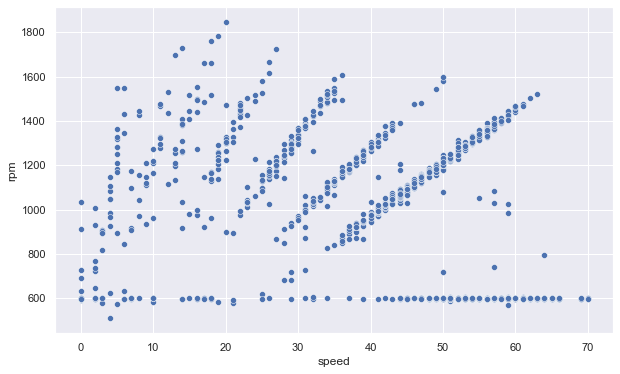

In [176]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=RS1['speed'], y = RS1['rpm'])

In [177]:
from sklearn.cluster import KMeans
kmeans = KMeans(6, random_state=0)

In [178]:
labels = kmeans.fit(RS1).predict(RS1)

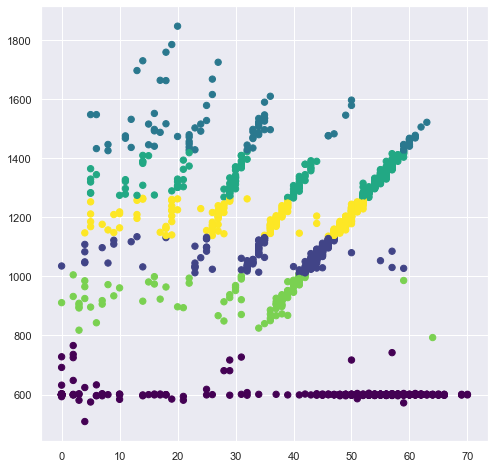

In [179]:
plt.figure(figsize=(8,8))
plt.scatter(RS1['speed'], RS1['rpm'], c=labels, s=40, cmap='viridis');


In [180]:
from sklearn.mixture import gmm

ImportError: cannot import name 'gmm' from 'sklearn.mixture' (/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/mixture/__init__.py)

In [181]:
from sklearn.cluster import AffinityPropagation

In [182]:
APmod = AffinityPropagation(damping = 0.9)

In [183]:
APmod.fit(RS1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


AffinityPropagation(damping=0.9)

In [184]:
RS1_AP_predict = APmod.predict(RS1)

In [185]:
clusters = set(RS1_AP_predict)

In [186]:
print(clusters)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}


In [187]:
from sklearn import mixture

In [320]:
RS1_GM = mixture.BayesianGaussianMixture(
    n_components=6, covariance_type='full', weight_concentration_prior=1e-5,
    weight_concentration_prior_type='dirichlet_distribution',
    mean_precision_prior=1e-9, covariance_prior=1e0 * np.eye(2),
    init_params="random", max_iter=120, random_state=2)

In [189]:
RS1_GM_Predict = RS1_GM.fit(RS1_Train)

In [190]:
labels = RS1_GM_Predict.predict(RS1_Train)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

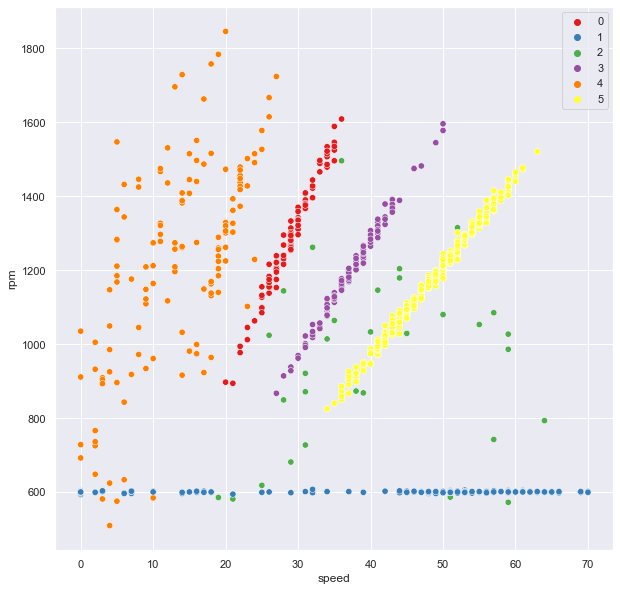

In [191]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=RS1_Train['speed'], y=RS1_Train['rpm'], palette = 'Set1', hue = labels, c = labels, s=40, cmap = 'viridis')

In [192]:
print(labels)

[2 3 3 ... 1 1 1]


In [193]:
print(set(labels))

{0, 1, 2, 3, 4, 5}


In [194]:
RS1_Test_Predict = RS1_GM_Predict.predict(RS1_Test)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

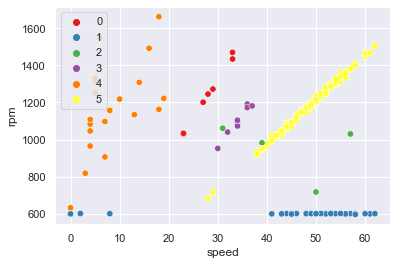

In [195]:
sns.scatterplot(x=RS1_Test['speed'], y=RS1_Test['rpm'], hue = RS1_Test_Predict, palette = 'Set1', c = RS1_Test_Predict, s=40, cmap = 'viridis')

In [196]:
RS2 = pd.read_csv('/users/ritwikchakradhar/Downloads/SVR2 - Sheet1.csv')

In [197]:
RS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   2629 non-null   int64
 1   rpm     2629 non-null   int64
dtypes: int64(2)
memory usage: 41.2 KB


In [322]:
RS2_Train = RS2[:2000]

In [323]:
RS2_Test = RS2[2000:]

In [329]:
RS2_Fit = RS1_GM.fit(RS2_Train)

In [330]:
RS2_Fit_Predict = RS2_Fit.predict(RS2_Train)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

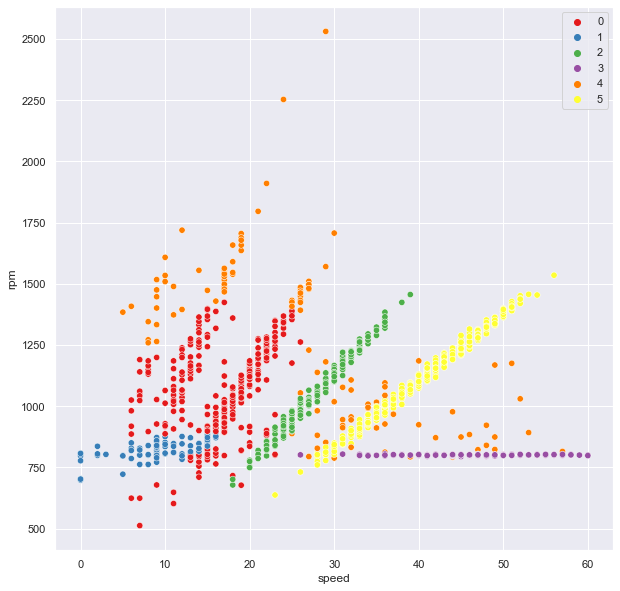

In [331]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=RS2_Train['speed'], y=RS2_Train['rpm'], hue = RS2_Fit_Predict, palette = 'Set1', s=40, cmap = 'viridis')

In [334]:
RS2_Test_Predict = RS2_Fit.predict(RS2_Test)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

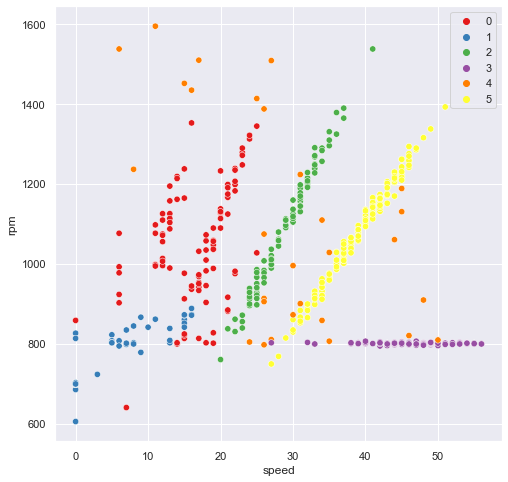

In [335]:
plt.figure(figsize = (8,8))
sns.scatterplot(x=RS2_Test['speed'], y=RS2_Test['rpm'], hue = RS2_Test_Predict, palette = 'Set1', c = RS1_Test_Predict, s=40, cmap = 'viridis')

In [205]:
import numpy as np
x = np.array(RS1['speed'])

In [206]:
y = np.array(RS1['rpm'])

<AxesSubplot:>

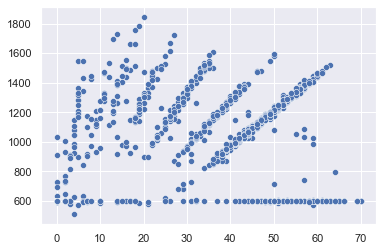

In [207]:
sns.scatterplot(x=x, y=y)

In [208]:
regress = np.poly1d(np.polyfit(x,y,85))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [209]:
sns.lineplot(regress)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Shape of passed values is (84, 1), indices imply (83, 1)

In [210]:
print(regress)

             83              82              81              80
-1.417e-140 x  + 5.613e-139 x  + 6.341e-137 x  + 3.092e-135 x 
               79              78              77              76
 + 4.788e-134 x  - 7.629e-132 x  - 1.025e-129 x  - 8.176e-128 x 
               75              74              73             72
 - 4.869e-126 x  - 2.038e-124 x  - 2.121e-123 x  + 6.82e-121 x 
               71              70              69             68
 + 9.305e-119 x  + 8.254e-117 x  + 5.842e-115 x  + 3.37e-113 x 
               67              66              65             64
 + 1.439e-111 x  + 1.996e-110 x  - 4.379e-108 x  - 6.49e-106 x 
               63             62              61             60
 - 6.108e-104 x  - 4.61e-102 x  - 2.897e-100 x  - 1.444e-98 x 
              59             58             57            56
 - 4.278e-97 x  + 1.598e-95 x  + 4.125e-93 x  + 4.47e-91 x 
              55            54             53             52
 + 3.668e-89 x  + 2.47e-87 x  + 1.335e-85 x  +

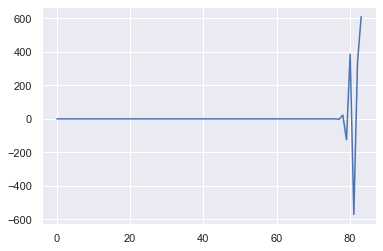

In [211]:
plt.plot(regress)

In [212]:
from sklearn.metrics import r2_score

In [213]:
r2 = r2_score(y, regress(x))

In [214]:
print(r2)

0.27393215431320206


In [215]:
y = labels

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
scale = StandardScaler()

In [218]:
import statsmodels.api as sm

In [219]:
RS1_Scaled_Train = scale.fit_transform(RS1_Train[['speed','rpm']])

In [220]:
RS1_Scaled_Train

array([[ 0.19475921,  0.55506946],
       [ 0.07694303,  1.0210432 ],
       [-0.09978124,  0.65159259],
       ...,
       [ 1.07838058, -1.45860279],
       [ 0.9605644 , -1.4552744 ],
       [ 1.07838058, -1.4552744 ]])

In [221]:
MultipleRegressPrediction = sm.OLS(y,RS1_Scaled_Train).fit()

In [222]:
print(MultipleRegressPrediction.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.089
Model:                            OLS   Adj. R-squared (uncentered):              0.088
Method:                 Least Squares   F-statistic:                              63.52
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                    4.80e-27
Time:                        14:09:32   Log-Likelihood:                         -3499.4
No. Observations:                1300   AIC:                                      7003.
Df Residuals:                    1298   BIC:                                      7013.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [223]:
RS1_Scaled_Test = scale.fit_transform(RS1_Test[['speed','rpm']])

In [224]:
MRprediction = MultipleRegressPrediction.predict(RS1_Scaled_Test)

In [225]:
print(MRprediction)

[-1.2673413  -1.24604648  2.20799397  1.49407063  1.54589839  1.63589235
  1.5268153   1.32392766  1.20721737  1.16683946  1.04470764  0.91051916
  0.79380886  0.8014421   0.86471972  0.85326987 -1.3995336  -1.33343745
 -1.28100287  1.95167366  1.77931898  1.65879207  1.56879811  1.48262077
  1.3697271   1.27812823  1.12485665  0.59855447  0.44367798  0.6236659
  0.83037015  1.06760736  0.88380282  0.84945325  0.9776134   0.84182001
  0.61000432  0.13552991  0.01500299 -0.1017073   0.55514249  1.56754469
  0.62141439 -0.29036634  2.0381627  -0.31048732 -0.06440325 -1.0394616
 -1.3762824  -0.33131127 -0.44420495  0.30406797  0.34605078  0.33841754
  0.31712273  0.2331571   0.19117429 -0.07880759 -0.39077228  0.15379066
 -0.46189867  0.66183209  0.9585303   1.09050707  1.04470764  0.80907534
  0.65419885  0.74800943  1.00051312  1.18813427  1.28194485 -1.38968865
 -1.3623655   1.50170387  1.37575543  1.53444854  1.43300472  1.49246572
  1.45208782  1.53826516  1.48864911  1.27973314  1.0

In [226]:
print(labels)

[2 3 3 ... 1 1 1]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

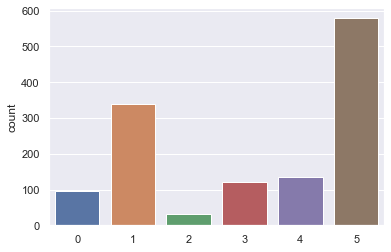

In [227]:
sns.countplot(labels)

In [228]:
MRprediction_train = MultipleRegressPrediction.predict(RS1_Scaled_Train)

In [229]:
print(MRprediction_train)

[ 0.65486241  1.11133364  0.65984624 ... -1.19357389 -1.22909954
 -1.19003434]


In [281]:
RS3 = pd.read_csv('/users/ritwikchakradhar/Downloads/SpeedRPM_3.csv')

In [282]:
RS3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   2053 non-null   int64  
 1   rpm     2048 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 32.2 KB


In [283]:
RS3.describe()

,speed,rpm
count,2053.000000,2048.000000
mean,35.545056,1120.079102
std,17.006579,341.689787
min,0.000000,234.000000
25%,24.000000,899.750000
50%,40.000000,1174.500000
75%,49.000000,1328.000000
max,70.000000,2325.000000


In [284]:
RS3.isnull().sum()

speed    0
rpm      5
dtype: int64

In [285]:
RS3_train = RS3[:1500]

In [286]:
RS3_test = RS3[1500:]

In [287]:
RS3_Train_Predict = RS1_GM.fit(RS3_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [288]:
RS3.dropna(axis=1)

,speed
0,0
1,0
2,0
3,0
4,0
...,...
2048,0
2049,0
2050,0
2051,0


In [289]:
RS3 = RS3.dropna(axis=0)

In [290]:
RS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2051
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   2048 non-null   int64  
 1   rpm     2048 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 48.0 KB


In [292]:
RS3_Train = RS3[:1500]

In [293]:
RS3_Test = RS3[1500:]

In [297]:
RS3_Train_Predict = RS1_GM.fit(RS3_Train)
RS3_Train_prediction = RS1_GM.predict(RS3_Train)

In [295]:
RS3_Test_Predict = RS3_Train_Predict.predict(RS3_Test)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

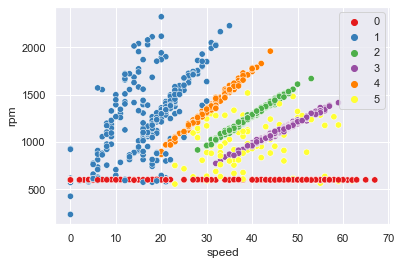

In [298]:
sns.scatterplot(x=RS3_Train['speed'], y=RS3_Train['rpm'], hue = RS3_Train_prediction, palette = 'Set1', c = RS1_Test_Predict, s=40, cmap = 'viridis')

<AxesSubplot:xlabel='speed', ylabel='rpm'>

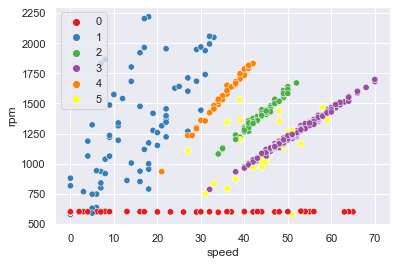

In [318]:

sns.scatterplot(x=RS3_Test['speed'], y=RS3_Test['rpm'], hue = RS3_Test_Predict, palette = 'Set1', c = RS1_Test_Predict, s=40, cmap = 'viridis')

In [306]:
RS4 = pd.read_csv('/users/ritwikchakradhar/Downloads/SpeedRPM_4.csv')

In [307]:
RS4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   2341 non-null   int64
 1   rpm     2341 non-null   int64
dtypes: int64(2)
memory usage: 36.7 KB


In [308]:
RS4_Train = RS4[:1800]

In [309]:
RS4_Test = RS4[1800:]

In [311]:
RS4_Train_Predict = RS1_GM.fit(RS4)

In [312]:
RS4_Train_Prediction = RS4_Train_Predict.predict(RS4_Train) 

<AxesSubplot:xlabel='speed', ylabel='rpm'>

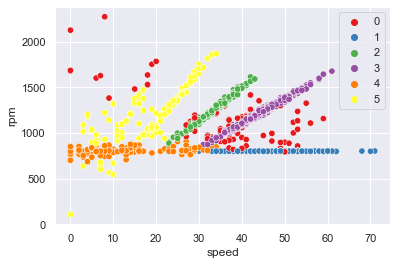

In [319]:

sns.scatterplot(x=RS4_Train['speed'], y=RS4_Train['rpm'], hue = RS4_Train_Prediction, palette = 'Set1', c = RS4_Train_Prediction, s=40, cmap = 'viridis')

In [316]:
RS4_Test_Prediction = RS4_Train_Predict.predict(RS4_Test) 

<AxesSubplot:xlabel='speed', ylabel='rpm'>

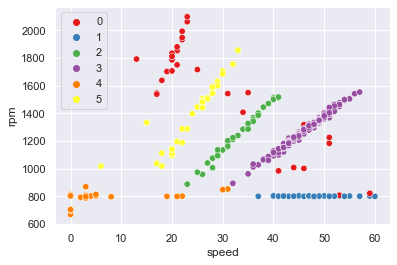

In [317]:
sns.scatterplot(x=RS4_Test['speed'], y=RS4_Test['rpm'], hue = RS4_Test_Prediction, palette = 'Set1', c = RS4_Test_Prediction, s=40, cmap = 'viridis')